Q1. Implement linear regression (LR) approach using batch gradient descent (BGD), stochastic gradient descent (SGD), and mini-batch gradient descent (MBGD) algorithms. Show the cost-function vs. epoch plots for LR with BGD, LR with SGD, and LR with MBGD models. Show the contour plots for cost function vs. w1 vs. w2 evaluated using LR with BGD, LR with SGD, and LR with MBGD models. For Q1, the data-q1.xlsx file must be used. The data q1.xlsx file contains two inputs and one output. You can consider w1 and w2 are the weight values of features.


In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import data
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/NNFL/Assignment1

/content/gdrive/My Drive/NNFL/Assignment1


In [ ]:
# function for normalising data
def norm(data):
  norm_data = data
  mean = np.mean(data)
  std = np.std(data)
  norm_data = (norm_data-mean)/std
  return norm_data

In [ ]:
# function for defining the hypothesis
def hypothesis(X, wt):
  # print(X.shape)
  # print(wt.T.shape)
  hyp = np.dot(X, wt.T)
  # print(hyp)
  return hyp

In [ ]:
# defining the cost function
def costfunction(hyp, y):
  J = (0.5/len(y))*(np.sum(hyp - y)**2)
  return J

In [ ]:
def bgd(alpha, iters, X, y, wt):
  cost_history = np.zeros(iters)
  wt_history = np.zeros((iters, 2))
  for i in range(iters):
    hyp = hypothesis(X, wt)
    wt = wt - (alpha/len(y))*np.dot(hyp - y, X)
    cost_history[i] = costfunction(hyp, y)
    wt_history[i] = wt[1:3]
  return cost_history, wt, wt_history

In [ ]:
def sgd(alpha, iters, X, y, wt):
  cost_history = np.zeros(iters)
  wt_history = np.zeros((iters, 3))
  for i in range(iters):
    rand_ind = np.random.randint(len(y))
    X_ind = X[rand_ind:rand_ind + 1]
    # print(X_ind.shape)
    y_ind = y[rand_ind:rand_ind + 1]
    # print(y_ind.shape)
    hyp = hypothesis(X_ind, wt)
    # wt = wt - (alpha/len(y))*np.dot(hyp - y_ind, X_ind)
    wt = wt - (alpha/len(y)) * (X_ind.T.dot(X_ind.dot(wt) - y_ind))
    cost_history[i] = costfunction(hyp, y_ind)
    wt_history[i] = wt
  return cost_history, wt, wt_history

In [ ]:
def mbgd(alpha, iters, X, y, wt, batch_size):
  cost_history = np.zeros(iters)
  wt_history = np.zeros((iters, 2))
  for i in range(iters):
    rand_ind = np.random.randint(len(y))
    X_batch = X[rand_ind:rand_ind + batch_size]
    y_batch = y[rand_ind:rand_ind + batch_size]
    hyp = hypothesis(X_batch, wt)
    wt = wt - (alpha/len(y))*np.dot(hyp-y_batch, X_batch)
    wt_history[i] = wt[1:3]
    cost_history[i] = costfunction(hyp, y_batch)
  return cost_history, wt, wt_history

[-0.75113891  0.15053991 -0.1118954 ]


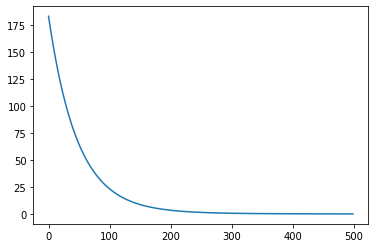

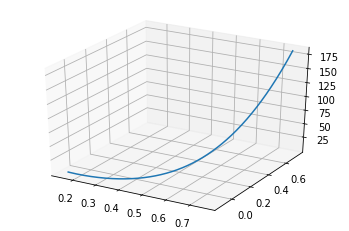

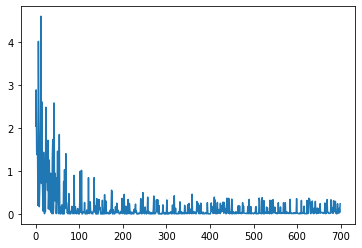

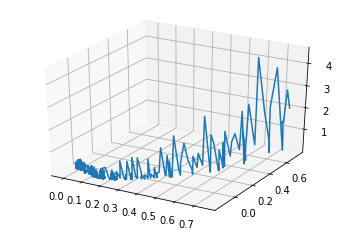

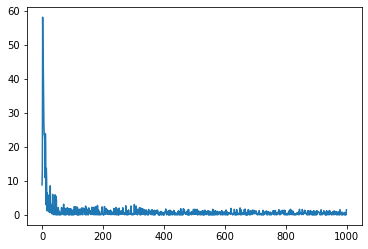

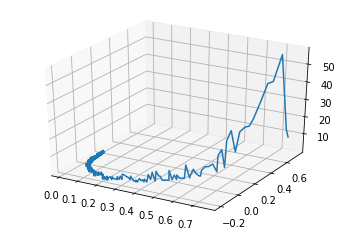

In [ ]:
# extracting the data and separating
data = pd.read_excel("data_q1.xlsx")
data = np.asarray(data)
data = norm(data)

# spliting the data into input and output
X = data[:, [0,-2]]  #input
y = data[:,-1]    #output
# print(y.shape)
m = X.shape[0]
# print(X, y, data)

# defining X and weights for processing
preprocess = np.ones([m,1])
X = np.append(preprocess, X, 1)
wt = np.random.rand(X.shape[1])

# hyp = hypothesis(X, wt)
# print(hyp)
# J = costfunction(hyp, y)
# print(costfn)

# defining hyperparameters
alpha = 0.005
iters = 500
batch = 30

# BGD results
J_bgd, wt_bgd, wt_bgd_history = bgd(alpha, iters, X, y, wt)
print(wt_bgd)
plt.plot(range(iters), J_bgd)
plt.show()

# fig = plt.figure()
ax = plt.axes(projection ='3d')
x_axis = wt_bgd_history[:,0]
y_axis = wt_bgd_history[:,1]
z_axis = J_bgd
ax.plot3D(x_axis, y_axis, z_axis)
# fig.show()
plt.show()

# fig, ax = plt.subplots(1,1)
# X,Y=np.meshgrid(x_axis,y_axis)
# Z = np.concatenate((x_axis,y_axis),axis=0)
# contour= plt.contourf(X, Y, Z)
# plt.show()

# SGD results
alpha = 1
iters = 700
J_sgd, wt_sgd, wt_sgd_history = sgd(alpha, iters, X, y, wt)
plt.plot(range(iters), J_sgd)
plt.show()

ax = plt.axes(projection ='3d')
x_axis = wt_sgd_history[:,1]
y_axis = wt_sgd_history[:,2]
z_axis = J_sgd
ax.plot3D(x_axis, y_axis, z_axis)
plt.show()

# mbgd results
alpha = 0.1
iters = 1000
J_mbgd, wt_mbgd, wt_mbgd_history = mbgd(alpha, iters, X, y, wt, batch)
plt.plot(range(iters), J_mbgd)
plt.show()

ax = plt.axes(projection ='3d')
x_axis = wt_mbgd_history[:,0]
y_axis = wt_mbgd_history[:,1]
z_axis = J_mbgd
ax.plot3D(x_axis, y_axis, z_axis)
plt.show()